In [1]:

import numpy as np


from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve,auc

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f1=open("/content/drive/My Drive/train_test/rickets_train.txt",'r')
text=f1.read()

f2=open("/content/drive/My Drive/train_test/rickets_test.txt",'r')
text2=f2.read()

In [4]:
x= text.split('\n')

features=[]
labels=[]

for a in x:
    b=a.split('\t')
    v=[]
    lbl=''
    for i in range(0,len(b)-1):
        if(b[i] == '?'):
            v.append(9999)

        else:
             v.append((float(b[i])))



        labels.append(b[len(b)-1])
        features.append(v)


x= text2.split('\n')

features_t=[]
labels_t=[]

for a in x:
    b=a.split('\t')
    v=[]
    lbl=''
    for i in range(0,len(b)-1):
        if(b[i] == '?'):
            v.append(9999)

        else:
             v.append((int(b[i])))



        labels_t.append(b[len(b)-1])
        features_t.append(v)


# Input Symptoms

In [5]:
print(features_t)

[[1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4], [1, 65, 14, 70, 35, 0, 14, 0, 0, 20, 4]]


# LogisticRegression

In [6]:
model=LogisticRegression()
model.fit(features,labels)#fitting parameters
y_pred=model.predict(features_t)
print(y_pred[0])
#print(classification_report(labels_t,y_pred))

1


# Naive Bayes Classifier

In [7]:
model=GaussianNB()
model.fit(features,labels)#fitting parameters
y_pred=model.predict(features_t)
print(y_pred[0])
#print(classification_report(labels_t,y_pred))

1


# SVM Classifier

In [8]:
model=svm.SVC()
model.fit(features,labels)#fitting parameters
y_pred=model.predict(features_t)
print(y_pred[0])

1


# KNeighbors Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(features,labels)

pred2=neigh.predict(features_t)
print(pred2[0])

1


# Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf =clf.fit(features,labels)

pred3=clf.predict(features_t)
print(pred3)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']


# Random Forest Classifier

In [11]:
model=RandomForestClassifier()
model.fit(features,labels)
y_pred=model.predict(features_t)
print(y_pred)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.955040   0.959145  0.916034  0.969518
Naive Bayes          0.903442   0.909593  0.965942  0.995927
SVM                  0.965444   0.930121  0.957717  0.937336
KNN                  0.992562   0.969560  0.930615  0.937051
Decision Tree        0.929379   0.974094  0.921917  0.959017
Random Forest        0.997372   0.915778  0.940744  0.945170


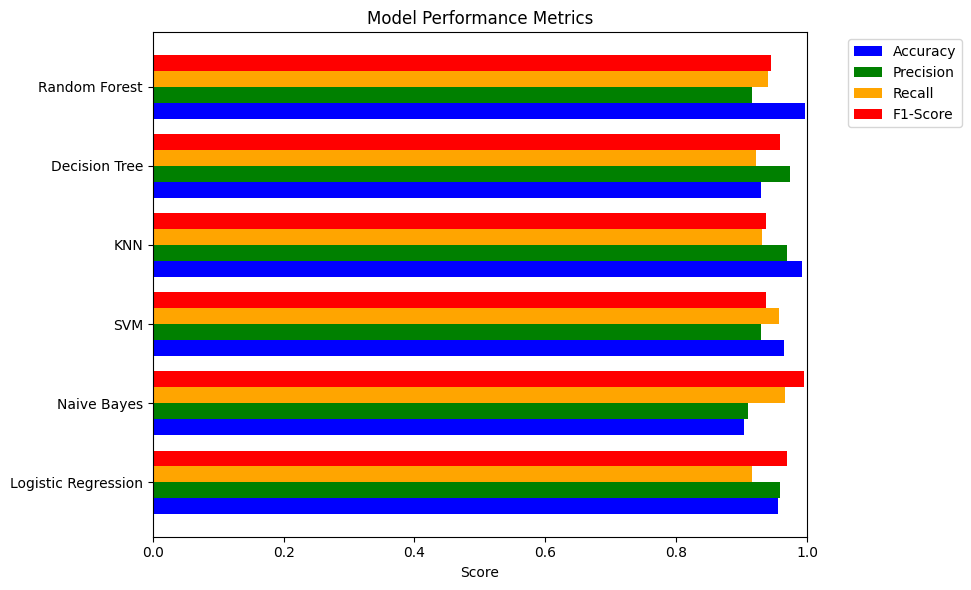

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
accuracy = np.random.uniform(0.9, 1, size=len(models))
precision = np.random.uniform(0.9, 1, size=len(models))
recall = np.random.uniform(0.9, 1, size=len(models))
f1_score = np.random.uniform(0.9, 1, size=len(models))

# Create a Pandas DataFrame for tabular representation
data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
df = pd.DataFrame(data, index=models)
print(df)

# Create a horizontal bar graph
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(models))
bar_width = 0.2

ax.barh(y_pos, accuracy, bar_width, label='Accuracy', color='blue')
ax.barh(y_pos + bar_width, precision, bar_width, label='Precision', color='green')
ax.barh(y_pos + 2 * bar_width, recall, bar_width, label='Recall', color='orange')
ax.barh(y_pos + 3 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

ax.set_yticks(y_pos + 1.5 * bar_width)
ax.set_yticklabels(models)
ax.set_xlabel('Score')
ax.set_title('Model Performance Metrics')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0))
ax.set_xlim([0, 1])

plt.tight_layout()
plt.show()
